In [9]:
import numpy as np

import librosa
from IPython.display import Audio

import tsaug
from tsaug.visualization import plot

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

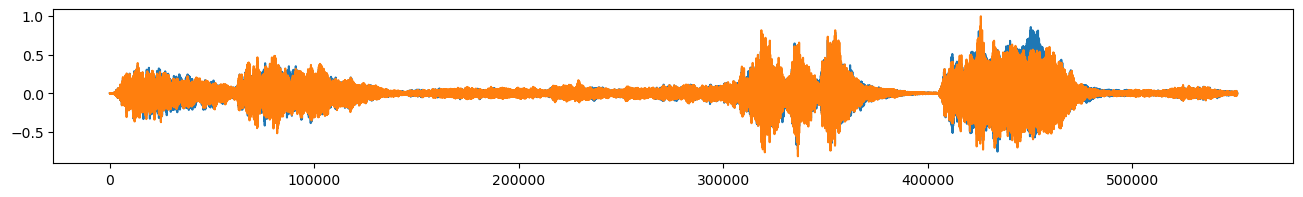

In [10]:
# load the audio data 
# First load the file into Jupyter via "Upload Files"
beethoven, samplerate = librosa.load("./beethoven.wav", mono=False)
beethoven = np.expand_dims(beethoven.swapaxes(0,1), 0) # reshape to input of tsaug
plot(beethoven)

In [3]:
Audio(beethoven.reshape(-1, 2).T, rate=samplerate)

In [11]:
# Perform data augmentation

# Use the following augmenters:
# - random crop subsequences of 10 seconds,
# - with 50% probability, add random noise up to 1% - 5%,
# drop out 10% of the time points and fill the dropped out points with zeros.

from tsaug import Crop, AddNoise, Dropout
n_augmentations = 5

my_augmenter = (
     Crop(size=samplerate * 10) * n_augmentations  
     + AddNoise(scale=(0.01, 0.05)) @ 0.5  
     + Dropout(
         p=0.1,
         fill=0,
         size=[int(0.001 * samplerate), int(0.01 * samplerate), int(0.1 * samplerate)]
     )  
)

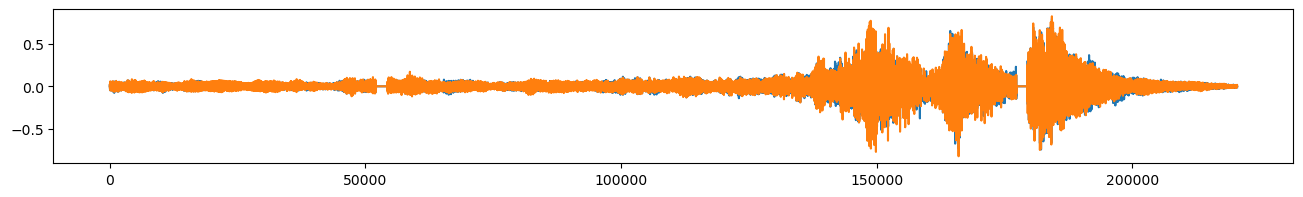

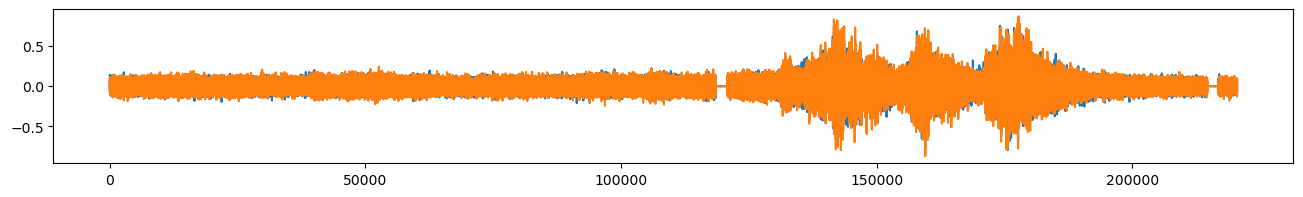

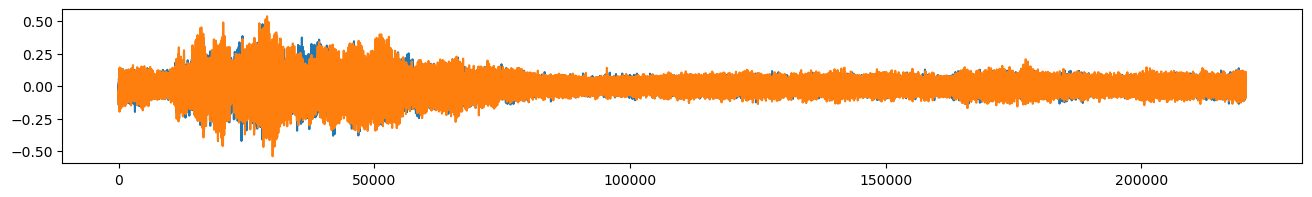

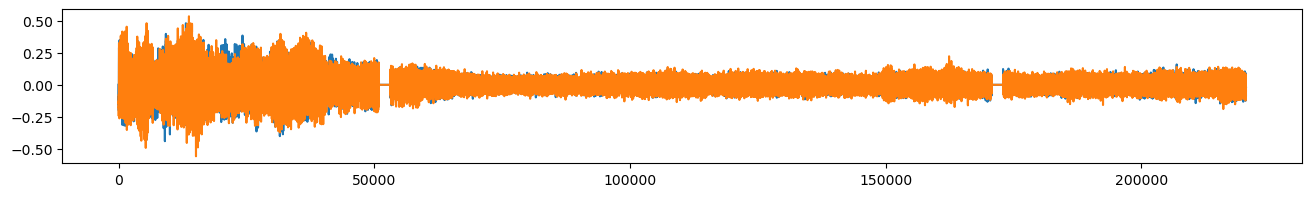

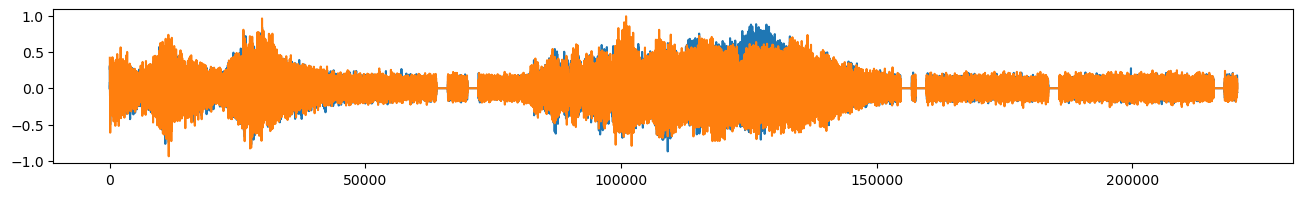

In [12]:
beethoven_aug = my_augmenter.augment(beethoven)
for i in range(5):
    plot(beethoven_aug[[i]])

In [6]:
Audio(beethoven_aug[0].reshape(-1, 2).T, rate=samplerate)

In [7]:
Audio(beethoven_aug[1].reshape(-1, 2).T, rate=samplerate)

In [8]:
# --->>> Your turn <<<---
# Try it yourself
# See here for a list of other augmenters:
# https://tsaug.readthedocs.io/en/stable/notebook/Examples%20of%20augmenters.html